In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram%20data.csv')
df.head()

,Date,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Conversion Rate,Caption,Hashtags
0,2021-12-10,3920,2586,1028,619,56,98,9,5,162,35,2,5.714286,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,2021-12-11,5394,2727,1838,1174,78,194,7,14,224,48,10,20.833333,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,2021-12-12,4021,2085,1188,0,533,41,11,1,131,62,12,19.354839,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,2021-12-13,4528,2700,621,932,73,172,10,7,213,23,8,34.782609,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2021-12-14,2518,1704,255,279,37,96,5,4,123,8,0,0.000000,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             176 non-null    object 
 1   Impressions      176 non-null    int64  
 2   From Home        176 non-null    int64  
 3   From Hashtags    176 non-null    int64  
 4   From Explore     176 non-null    int64  
 5   From Other       176 non-null    int64  
 6   Saves            176 non-null    int64  
 7   Comments         176 non-null    int64  
 8   Shares           176 non-null    int64  
 9   Likes            176 non-null    int64  
 10  Profile Visits   176 non-null    int64  
 11  Follows          176 non-null    int64  
 12  Conversion Rate  176 non-null    float64
 13  Caption          176 non-null    object 
 14  Hashtags         176 non-null    object 
dtypes: float64(1), int64(11), object(3)
memory usage: 20.8+ KB


In [4]:
# Converting the 'Date' column to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Extracting day of the week from the 'Date' column
df['Day_of_Week'] = df['Date'].dt.day_name()

In [5]:
# Extracting unique hashtags and count their frequency of occurrence
df['Hashtags_List'] = df['Hashtags'].str.split(' ')
hashtags_exploded = df.explode('Hashtags_List')

In [6]:
# Calculating average impressions and likes based on day of the week
day_of_week_engagement = df.groupby('Day_of_Week').agg({
    'Impressions': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean'
}).sort_values(by='Impressions', ascending=False)

# Calculate average impressions and likes per hashtag
hashtag_engagement = hashtags_exploded.groupby('Hashtags_List').agg({
    'Impressions': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean'
}).sort_values(by='Impressions', ascending=False).head(10)

day_of_week_engagement, hashtag_engagement

(             Impressions       Likes  Comments     Shares
 Day_of_Week                                              
 Tuesday         28746.48  393.520000  9.320000  50.520000
 Monday          23369.48  292.560000  7.080000  16.800000
 Sunday          20850.64  337.160000  9.120000  25.640000
 Wednesday       19157.12  301.240000  8.040000  24.880000
 Saturday        16431.68  279.840000  7.840000  28.920000
 Thursday        16099.88  260.640000  6.880000  16.880000
 Friday          13395.00  256.230769  6.730769  18.076923,
                                                       Impressions  \
 Hashtags_List                                                       
 #pythonprogrammer                                   107722.000000   
 #pythonprogramminglanguage                          107722.000000   
 #python3                                            107722.000000   
 #pythoncoding                                       107722.000000   
 #pythondeveloper                               

C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_26796\249741079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_engagement.index, y=day_of_week_engagement['Impressions'], palette='Blues')


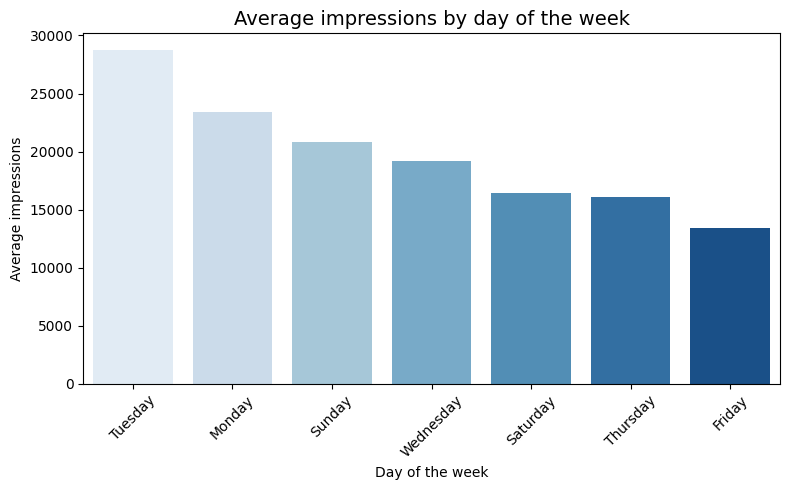

In [7]:
# Plotting average impressions by day of the week
plt.figure(figsize=(8, 5))  # Reduced from (10, 6)
sns.barplot(x=day_of_week_engagement.index, y=day_of_week_engagement['Impressions'], palette='Blues')
plt.title('Average impressions by day of the week', fontsize=14)
plt.xlabel('Day of the week', fontsize=10)
plt.ylabel('Average impressions', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

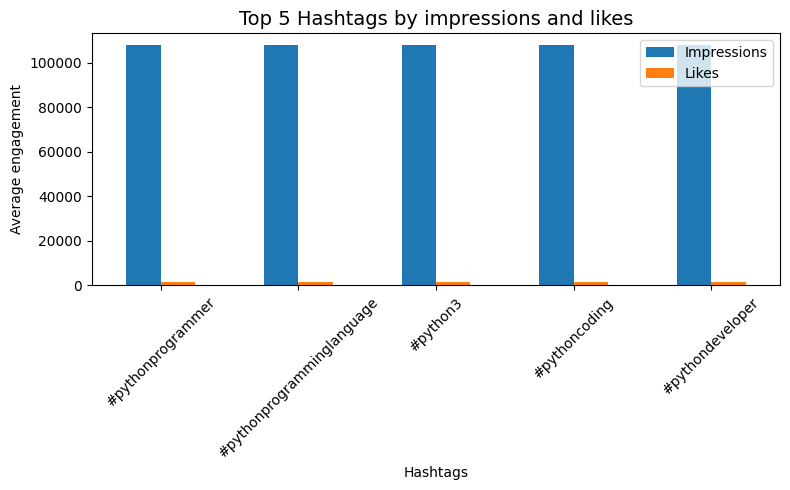

In [8]:
# Top 5 hashtags by impressions and likes
plt.figure(figsize=(8,5))
top_hashtags = hashtag_engagement[['Impressions', 'Likes']].head(5)  # Changed from 10 to 5
top_hashtags.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#ff7f0e'])
plt.title('Top 5 Hashtags by impressions and likes', fontsize=14)
plt.xlabel('Hashtags', fontsize=10)
plt.ylabel('Average engagement', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

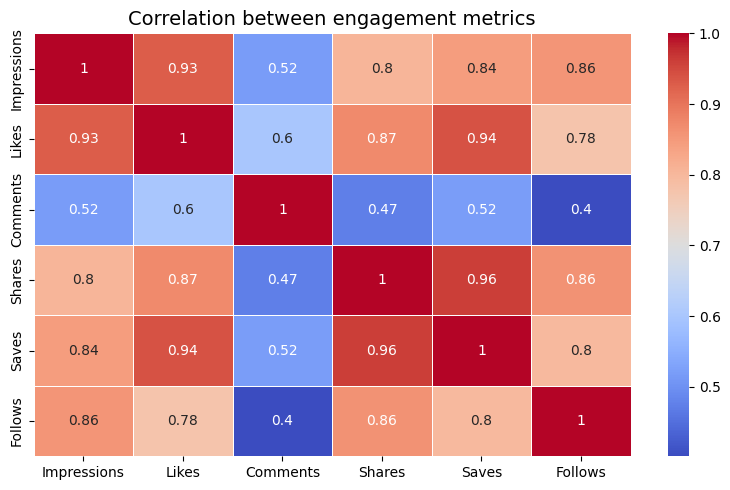

In [9]:
# Checking the correlation heatmap
plt.figure(figsize=(8,5))
correlation_matrix = df[['Impressions', 'Likes', 'Comments', 'Shares', 'Saves', 'Follows']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between engagement metrics', fontsize=14)
plt.tight_layout()
plt.show()

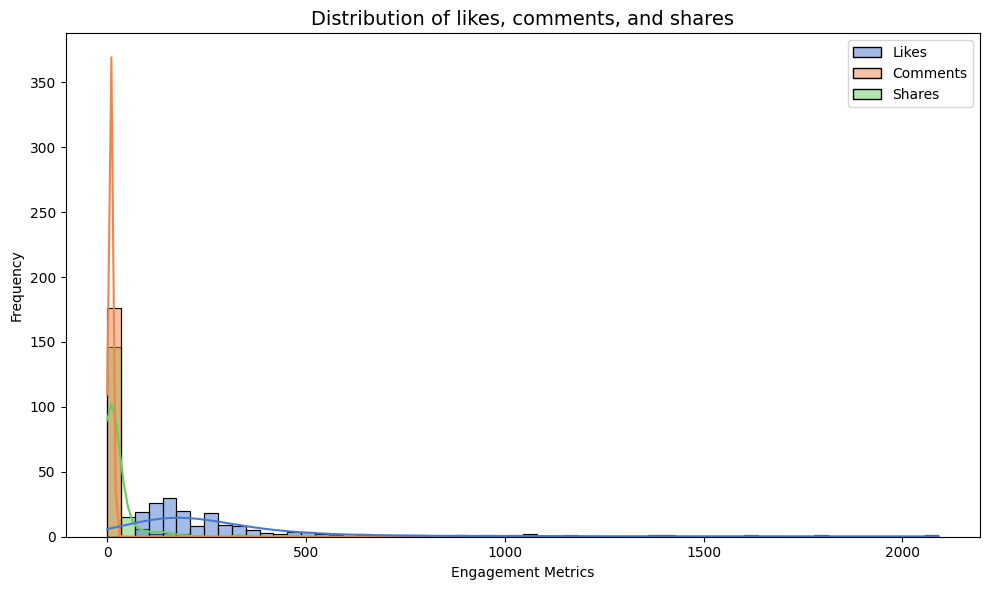

In [10]:
# Plotting distribution of likes, comments, and shares
plt.figure(figsize=(10,6))
sns.histplot(df[['Likes', 'Comments', 'Shares']], kde=True, palette='muted')
plt.title('Distribution of likes, comments, and shares', fontsize=14)
plt.xlabel('Engagement Metrics', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

### Hashtag Recommendation system

In [11]:
# Create a function to recommend top 5 hashtags based on engagement (impressions)
def recommend_hashtags(df, top_n=5):

# group by hashtags and calculate mean impressions and likes
    hashtag_performance = df.explode('Hashtags_List').groupby('Hashtags_List').agg({
        'Impressions': 'mean',
        'Likes': 'mean'
    }).sort_values(by='Impressions', ascending=False)
    
# get top N hashtags
    top_hashtags = hashtag_performance.head(top_n).index.tolist()
    return top_hashtags

top_hashtags = recommend_hashtags(df)
print(f"Recommended Hashtags: {top_hashtags}")

Recommended Hashtags: ['#pythonprogrammer', '#pythonprogramminglanguage', '#python3', '#pythoncoding', '#pythondeveloper']


### Post timing Recommendation System

In [12]:
# Creat a function to recommend the best days to post based on historical engagement
def recommend_post_day(df, top_n=3):

# group by day of the week and calculate mean engagement metrics
    day_performance = df.groupby('Day_of_Week').agg({
        'Impressions': 'mean',
        'Likes': 'mean'
    }).sort_values(by='Impressions', ascending=False)
    
# get top N days
    top_days = day_performance.head(top_n).index.tolist()
    return top_days

top_days = recommend_post_day(df)
print(f"Recommended Post Days: {top_days}")

Recommended Post Days: ['Tuesday', 'Monday', 'Sunday']


#### While other days are still important, more posts should be made in these recommended days to increase engagement.
#### Thank you